In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Practically speaking, the Central limit theorm says  the following :

The distribution of the sum of i.i.d random variables (Xi) converges to a normal distribution

In simple words if you draw n i.i.d samples of a certain distribution, add them and plot a histogram of the result,
you will get a distribution that approximates to a NORMAL distribution! 

The most amazing part is that it the distribution of the random variables (Xi) do not matter!!!

Central Limit Theorem is considered one of the most powerful and elegant results of Probability Theory

Central Limit Theorem says much more that this (for example : about the mean and the variance of the normal distribution)

Theoritically, Central Limit Theorem says 
    1. Standardized sum = (Sn - n*(Mean))/(Standard Deviation) converges to standard normal (not the above statement) 
    2. CDF and not PDF converges 
    (but for practical purposes it doesn't matter much (because the sum of NORMAL random variables is a NORMAL))
 

In [2]:
# configuration
num_samples = 500  # no of iid random variables to add
num_draws = 10000  # no of samples(sums) that we want to draw
num_bins  = 200    # how finely we want to divide the histogram

# uniform distribution  :
start = 0
end = 1
uniform_samples = lambda numSamples : np.random.uniform(start, end, numSamples)

# exponential distribution : 
_lambda = 0.5
exponential_samples = lambda numSamples : np.random.exponential(1/_lambda, numSamples)

Now we simply to verify that the random number generator that we have does infact gives values from the stated distribution.

The uniform distribution gives (almost) unifrom values from the said range.
The exponential distribution gives values that tend to be closer to 0 with high probability.

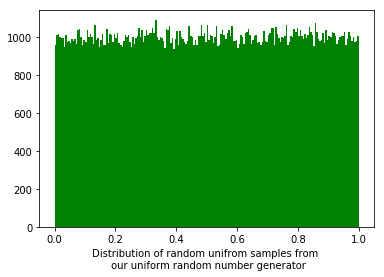

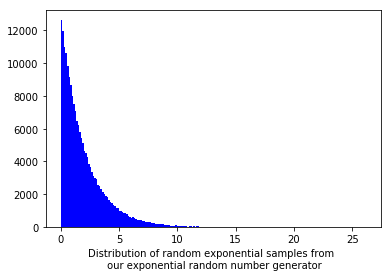

In [3]:
# verify that the function does infact gives values of the desired distribution
plt.hist(uniform_samples(200000), bins=num_bins, color="green");
plt.xlabel("Distribution of random unifrom samples from \n our uniform random number generator")
plt.show()

plt.hist(exponential_samples(200000), bins=num_bins, color="blue");
plt.xlabel("Distribution of random exponential samples from \n our exponential random number generator")
plt.show()

Now Let's verify the Central Limit Theorem

In [4]:
# draw <num_draws> number of samples where each sample = sum(X1, X2, .... X<num_samples>)
# all Xi are independent and identically distributed
uniform_draws = [sum(uniform_samples(num_samples)) for i in range(num_draws)]
exponential_draws = [sum(exponential_samples(num_samples)) for i in range(num_draws)]

You will observe that the distribution of the sums will tend to converge to NORMAL distribution

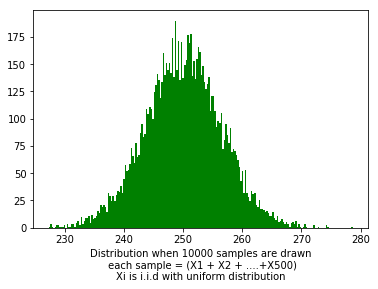

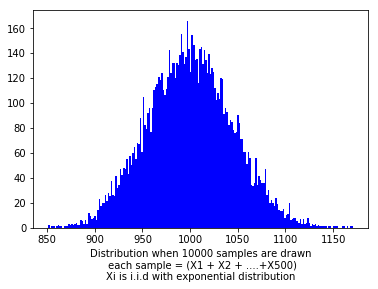

In [5]:
# plot for sample drawn from unifrom distribution
plt.hist(uniform_draws, bins=num_bins, color="green");
plt.xlabel("Distribution when " + str(num_draws) + " samples are drawn\n each sample = (X1 + X2 + ....+X"
           +  str(num_samples) + ")\nXi is i.i.d with uniform distribution")
plt.show()

# plot for sample drawn from exponential distribution
plt.hist(exponential_draws, bins=num_bins, color="blue");
plt.xlabel("Distribution when " + str(num_draws) + " samples are drawn\n each sample = (X1 + X2 + ....+X"
           + str(num_samples) + ")\nXi is i.i.d with exponential distribution")
plt.show()